plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- Neumann boundary conditions; know that function is called, but is it working?

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/SOG2D_1h_20141019_20141019_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/SOG2D_1h_20141019_20141019_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)

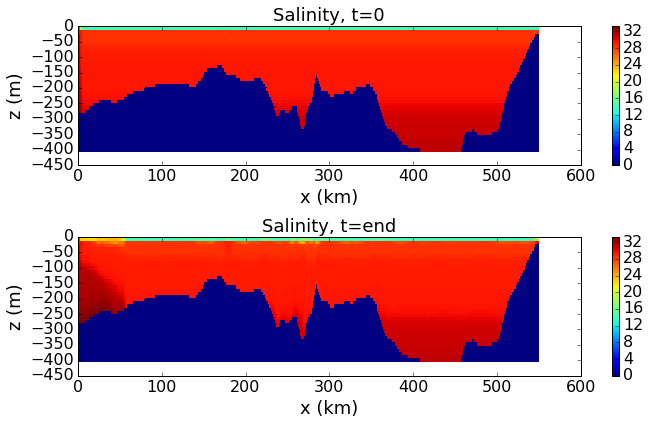

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['vosaline'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -50, 0])
#axs[0].axis([400, 550, -150, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['vosaline'][-1,:,7,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -50, 0])
#axs[1].axis([400, 550, -150, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

In [4]:
A=np.sum(f2.variables['vosaline'][-1,:,:,1090:1099])
print(A)
B=np.sum(f2.variables['vosaline'][0,:,:,1090:1099])
print(B)
print((A-B)/B*100,'%')

2909.7
2644.87
10.0131243467 %


In [5]:
print(f2.variables['vosaline'][0,10:20,5,15])

[ 29.31356621  29.34072495  29.35553551  29.36097336  29.36978912
  29.38357925  29.39004898  29.39531898  29.39654922  29.44296837]


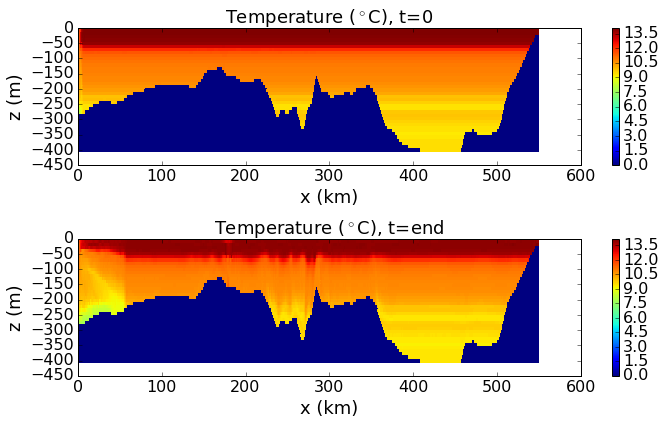

In [6]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['votemper'][0,:,2,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['votemper'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


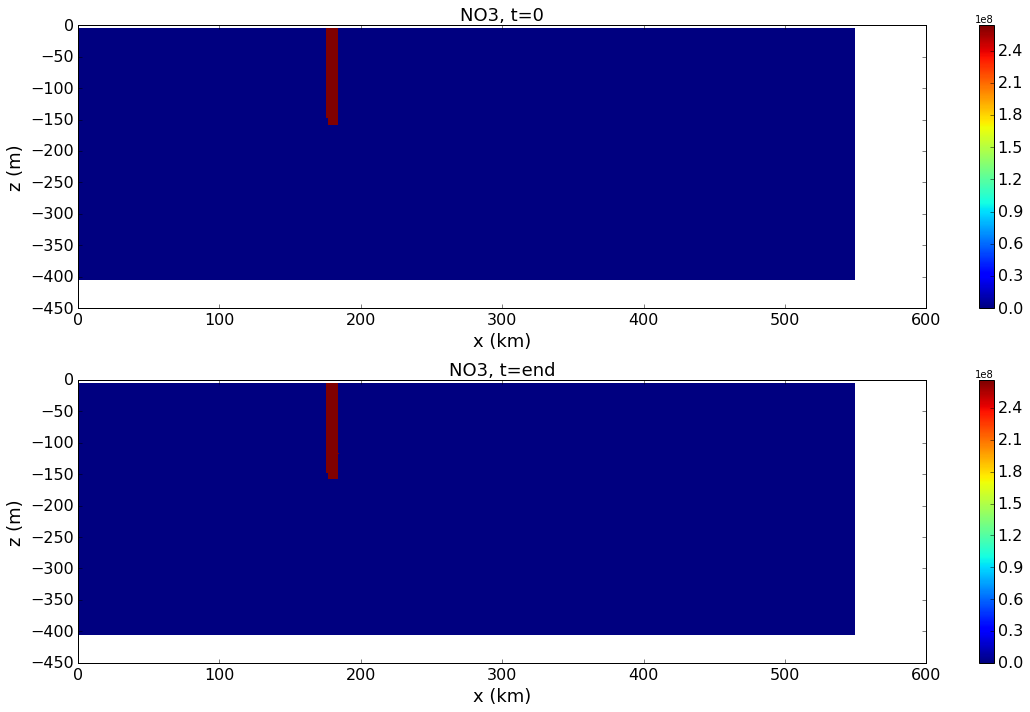

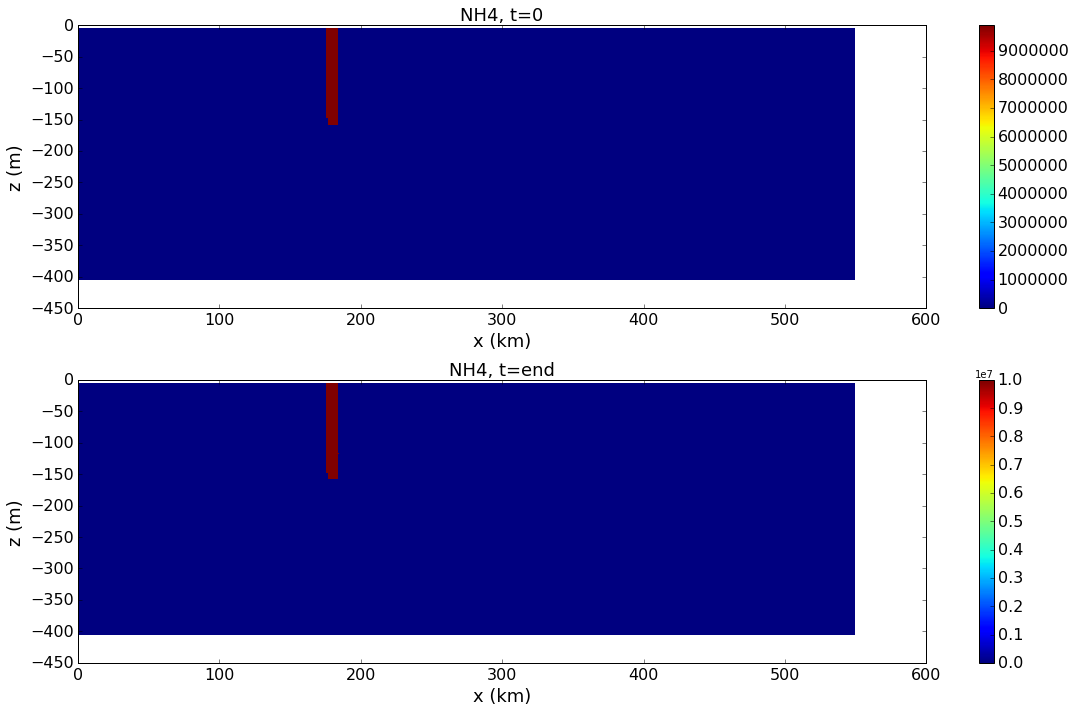

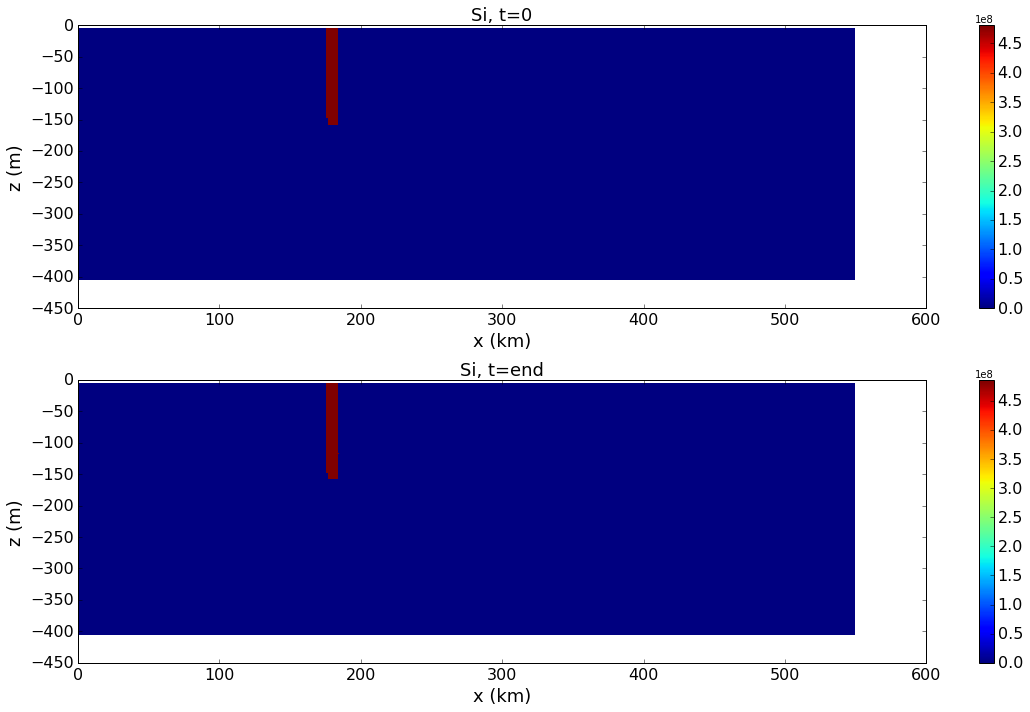

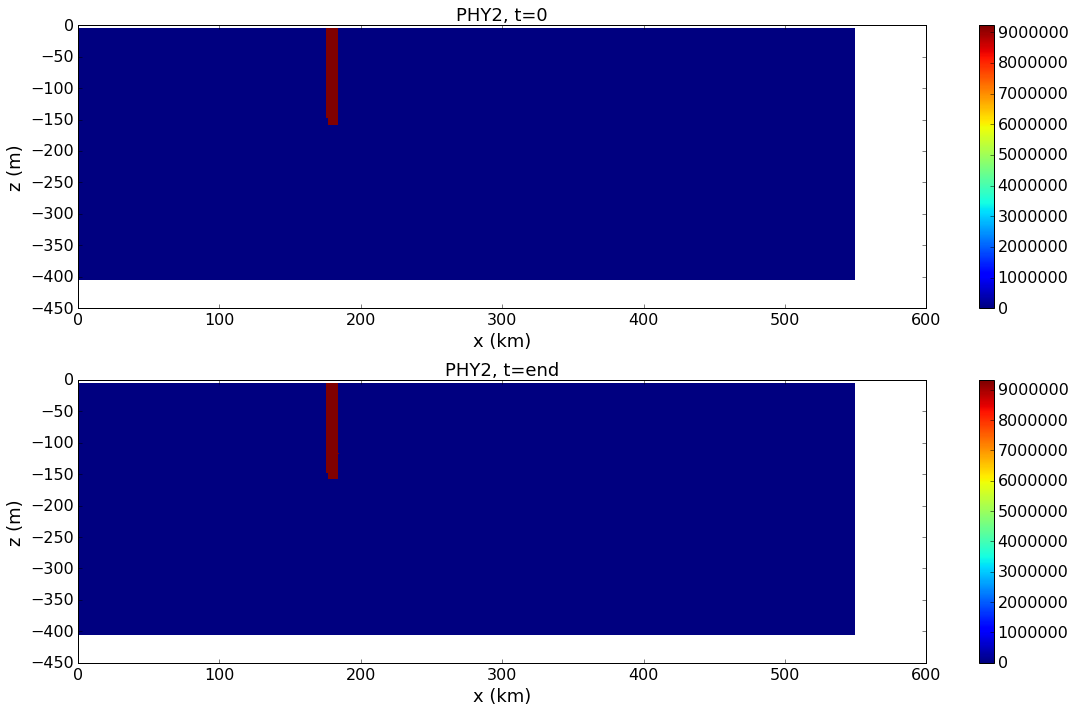

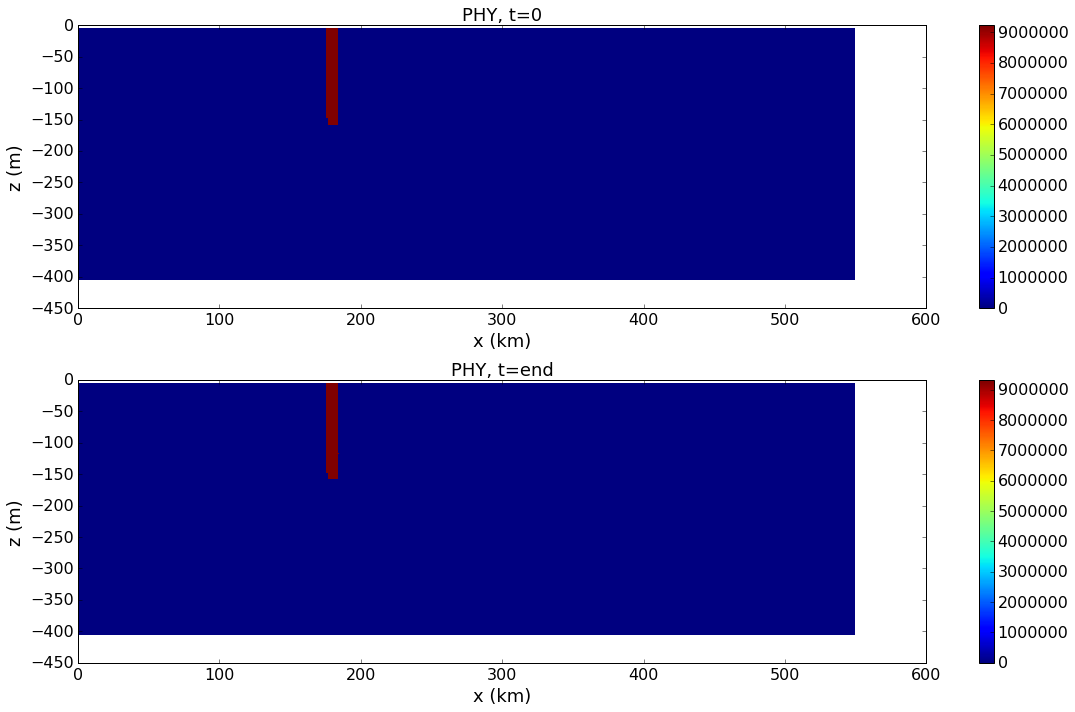

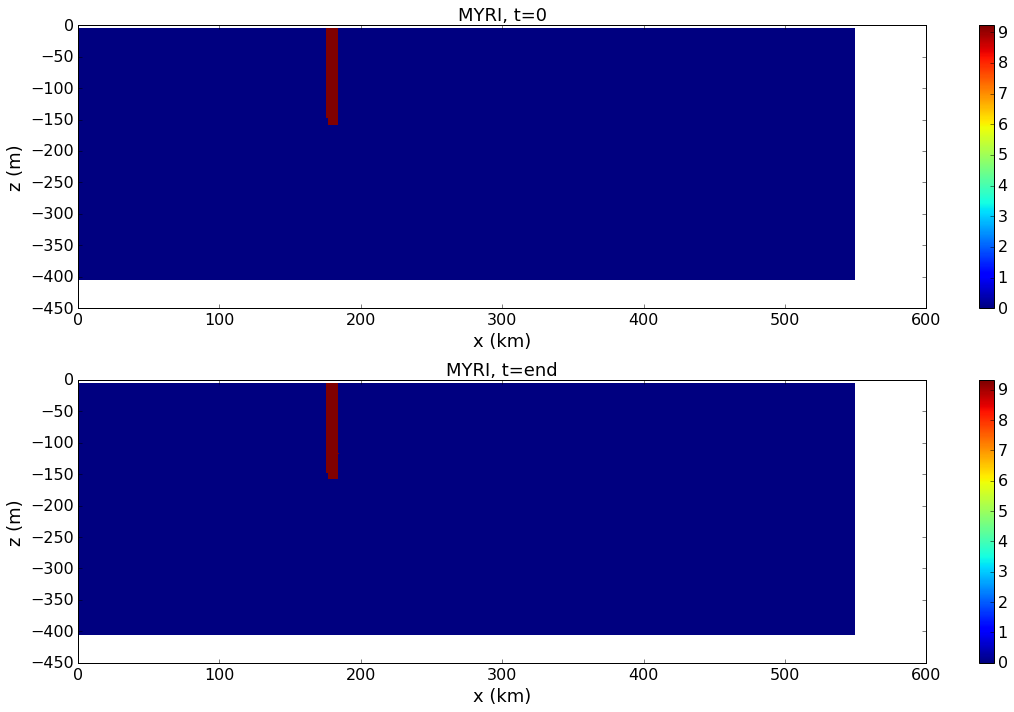

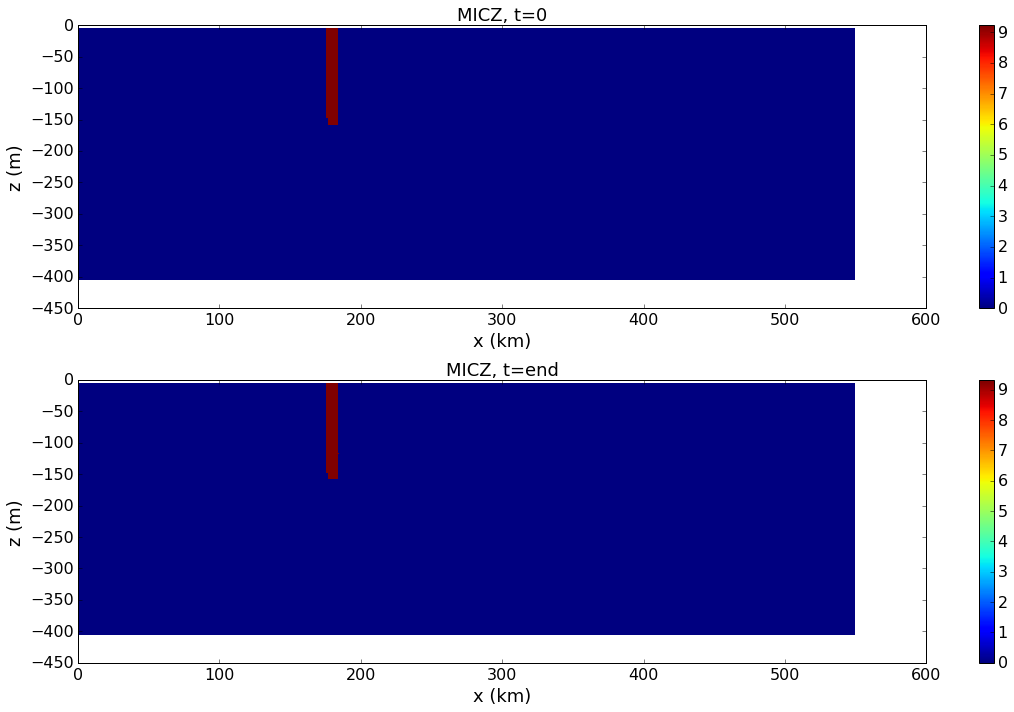

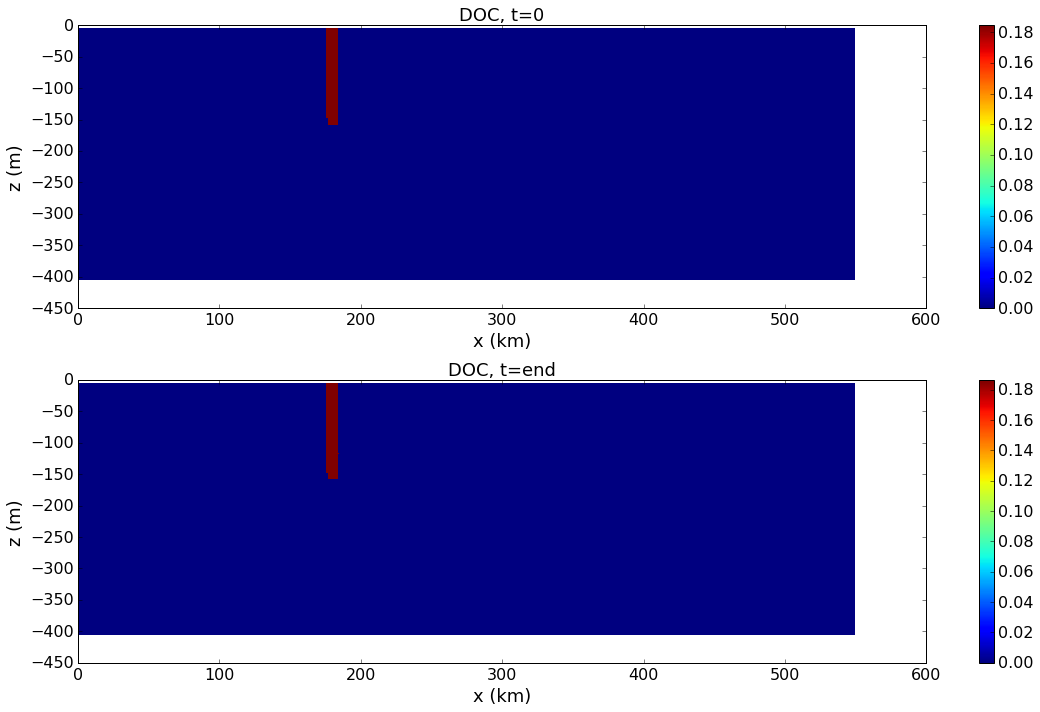

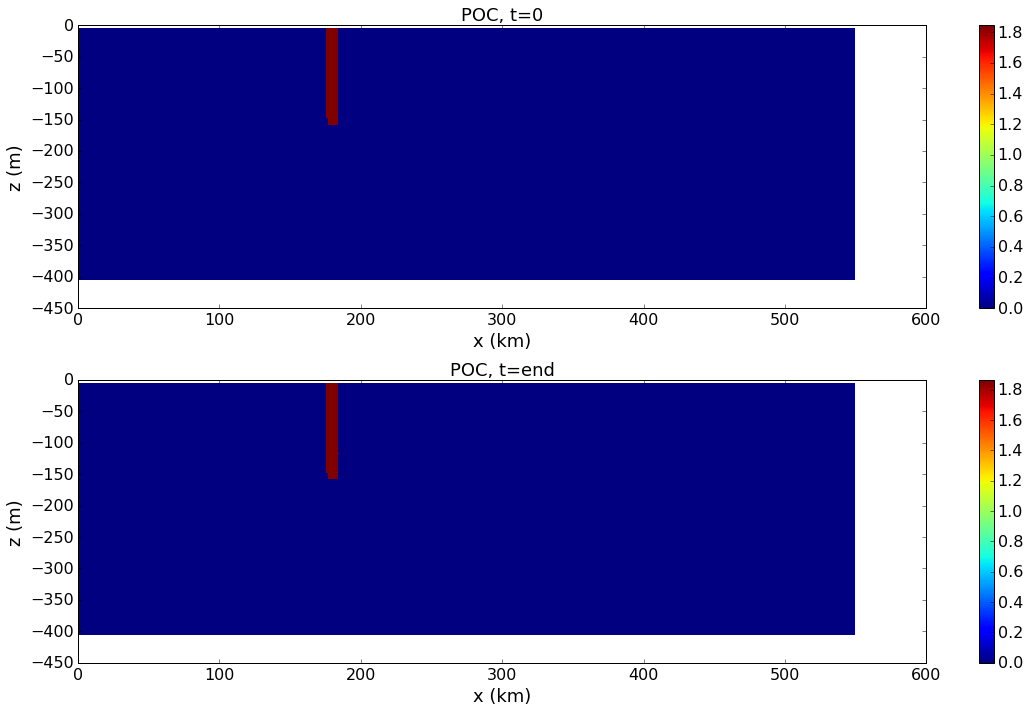

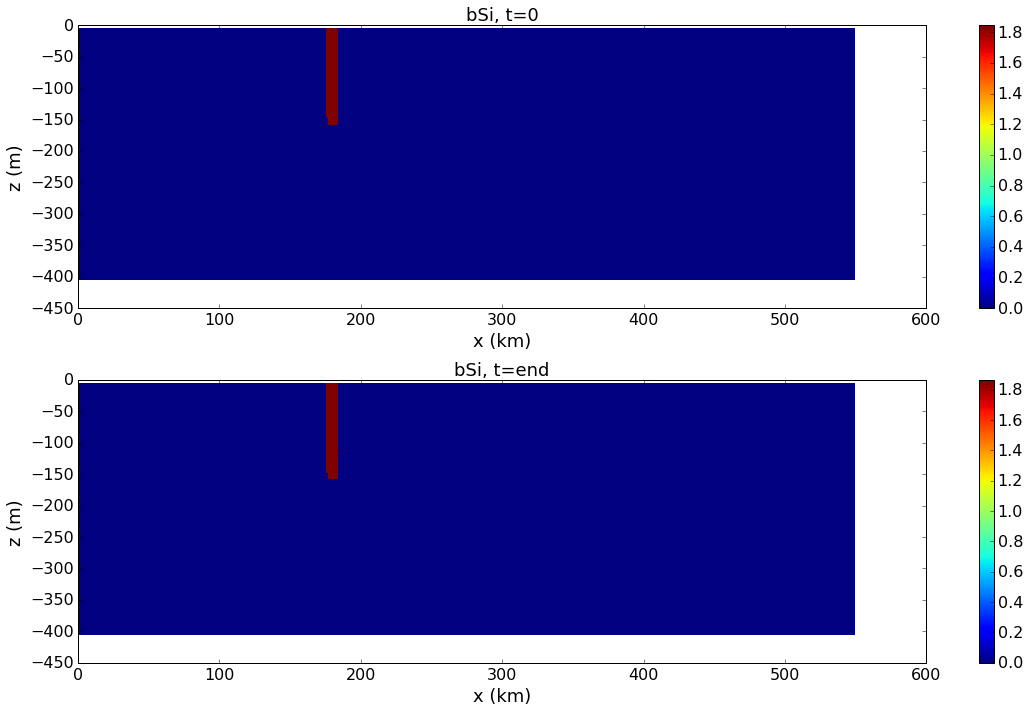

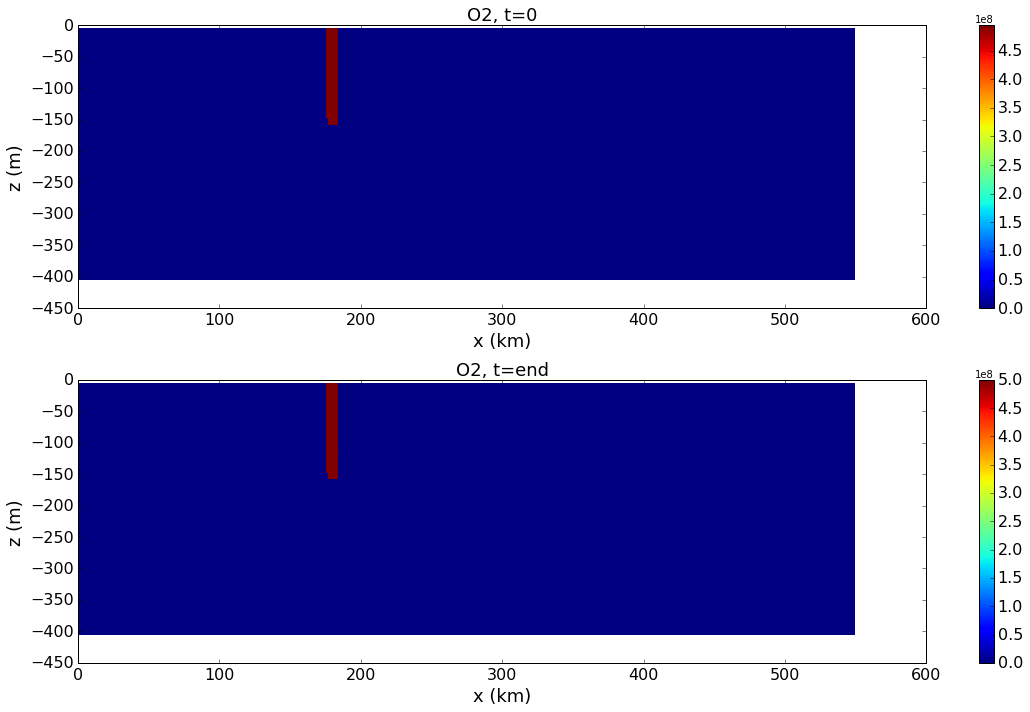

In [13]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(16,10))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,1,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        #axs[0].axis([400, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][-1,:,1,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([500, 550, -50, 0])
        #axs[1].axis([400, 550, -150, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [8]:
#print(f.variables['O2'][23,1,:,1090:1099])
A=np.mean(f.variables['O2'][-1,1:2,5,1090:1099])
print(A)
B=np.mean(f.variables['O2'][0,1:2,5,1090:1099])
print(B)
print((A-B)/B*100,'%')

177.6
177.6
-0.000128874899019 %


In [9]:
print(f.variables['deptht'][:])

[   5.1282053    15.38461494   25.64102554   35.89743423   46.15384674
   56.41025543   66.66666412   76.92308044   87.17948914   97.43589783
  107.69230652  117.94871521  128.2051239   138.46153259  148.71794128
  158.97436523  169.23077393  179.48718262  189.74359131  200.
  210.25640869  220.51281738  230.76922607  241.02563477  251.28205872
  261.53845215  271.79486084  282.05126953  292.30767822  302.56411743
  312.82052612  323.07693481  333.33334351  343.5897522   353.84616089
  364.10256958  374.35897827  384.61538696  394.87179565  405.12820435]


In [10]:
print(f.variables['O2'][-1,1,5,1080:1099])
print(f.variables['O2'][-1,2,5,1080:1099])
print(f.variables['O2'][-1,3,5,1080:1099])
print(f.variables['O2'][-1,4,5,1080:1099])
print(f.variables['O2'][-1,5,5,1080:1099])

[ 177.59988403  177.59988403  177.59986877  177.59986877  177.59985352
  177.59985352  177.59983826  177.59983826  177.59986877  177.59991455
  177.59996033  177.60002136  177.59986877  177.59973145  177.59968567
  177.59967041  177.59967041  177.59967041  177.59968567]
[ 177.59988403  177.59988403  177.59988403  177.59988403  177.59988403
  177.59988403  177.59988403  177.59988403  177.59988403  177.59988403
  177.59988403  177.59989929    0.            0.            0.            0.
    0.            0.            0.        ]
[ 177.59988403  177.59988403  177.59988403  177.59988403  177.59988403
  177.59988403  177.59988403  177.59988403  177.59988403    0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.        ]
[ 177.59988403  177.59988403  177.59988403  177.59988403  177.59988403
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0. 

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


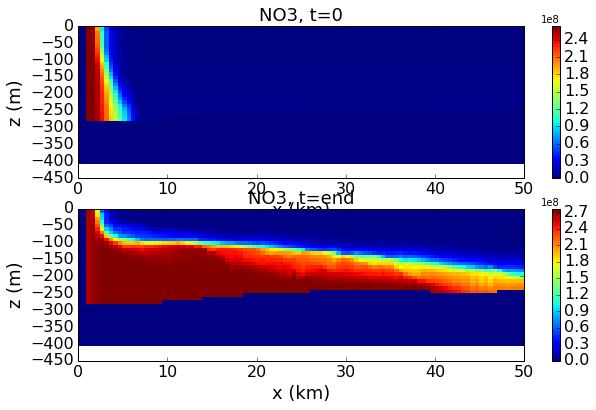

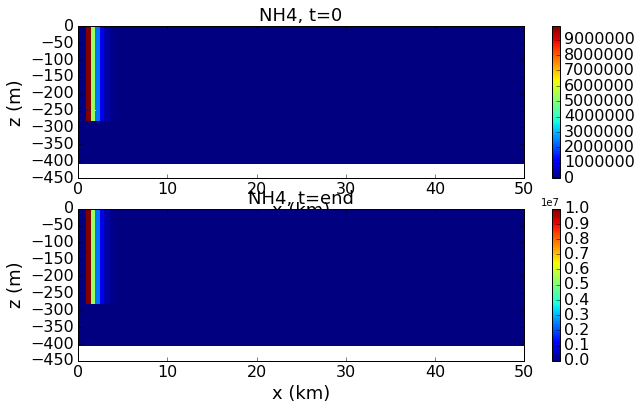

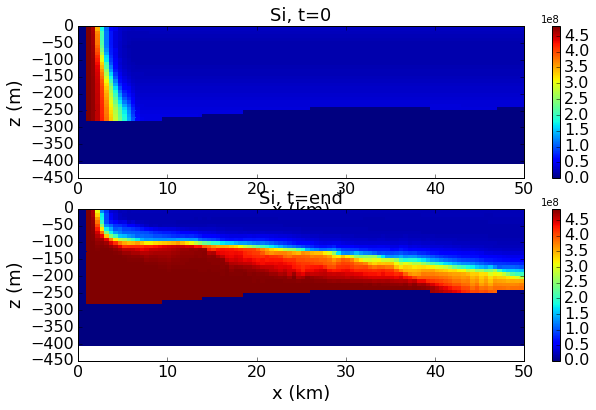

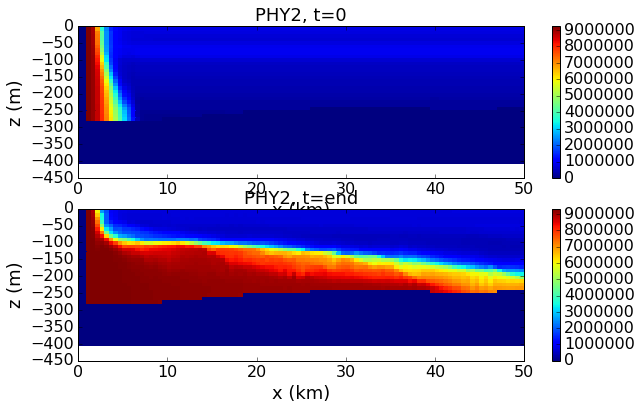

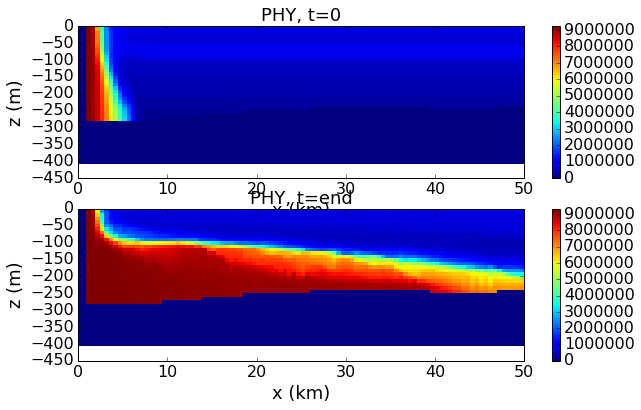

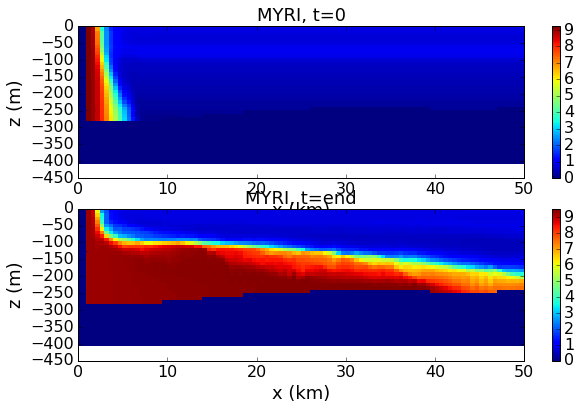

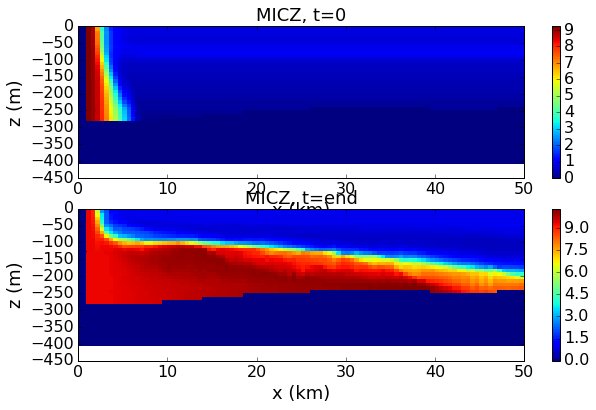

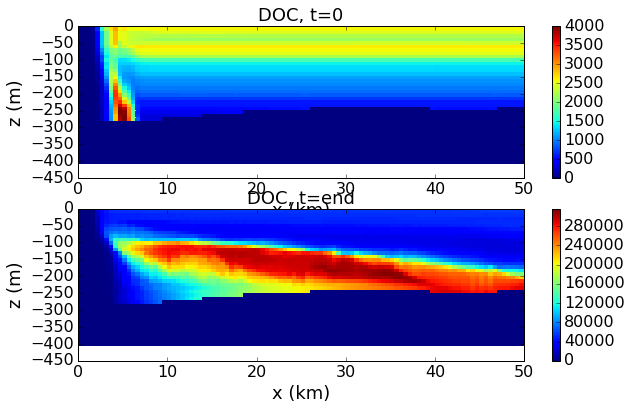

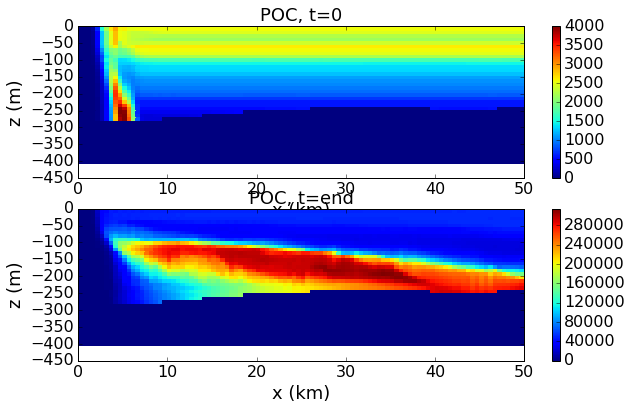

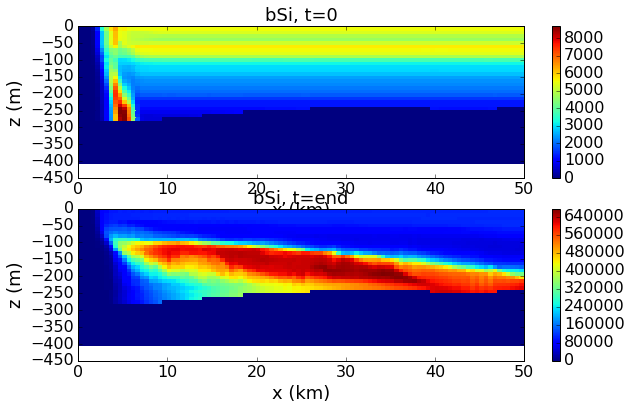

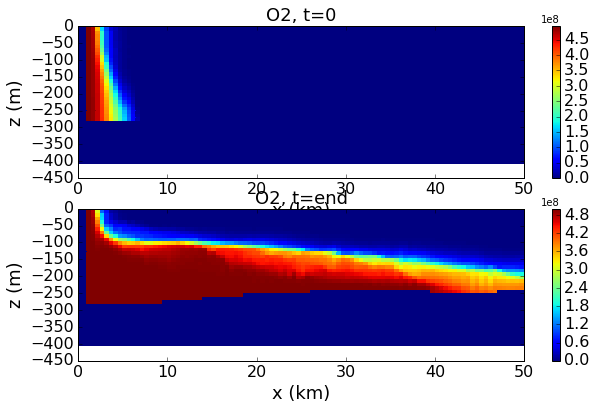

In [11]:
#zoom in:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        axs[0].axis([0, 50, -450, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][-1,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        axs[1].axis([0, 50, -450, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


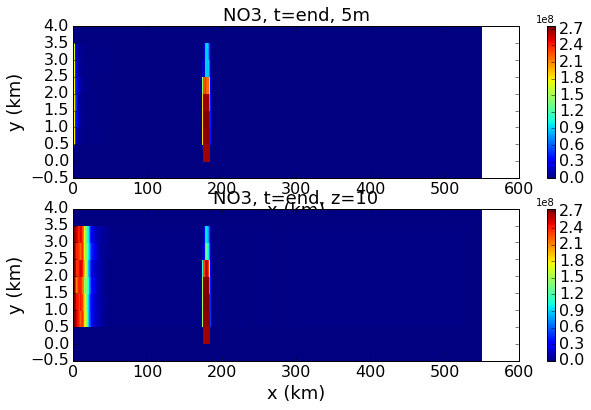

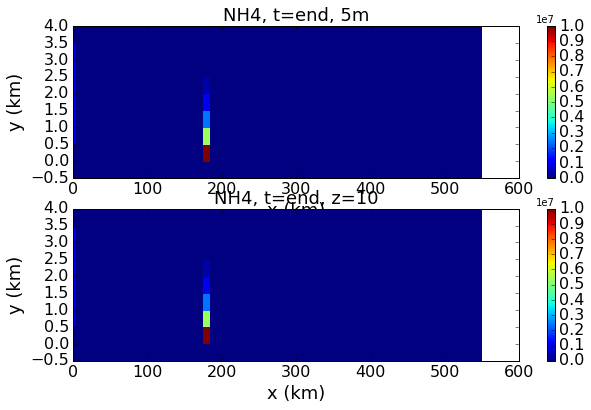

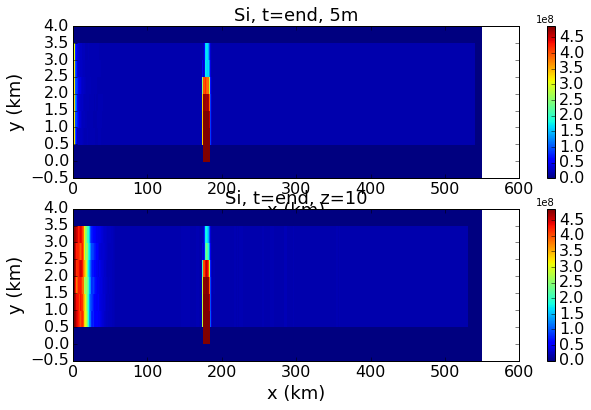

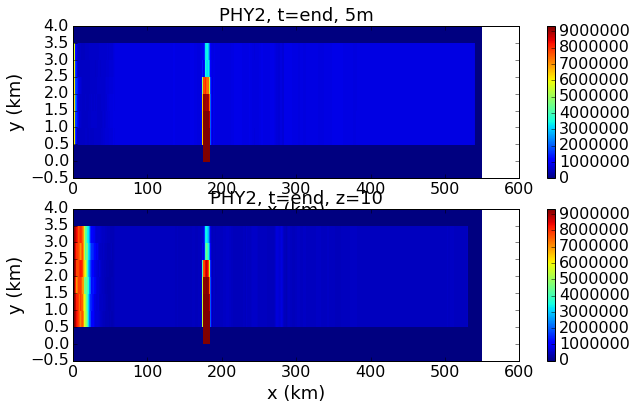

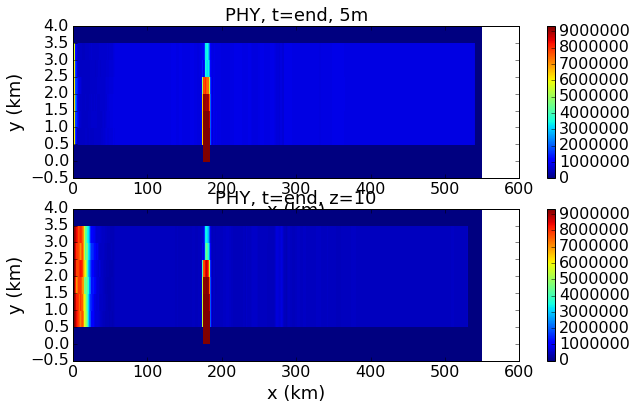

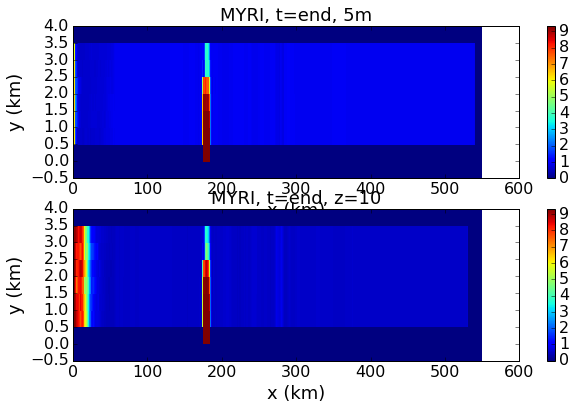

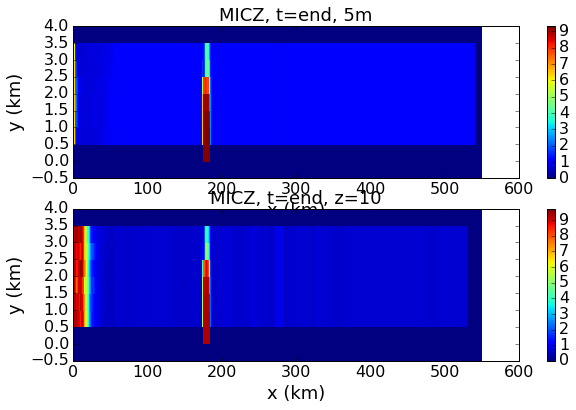

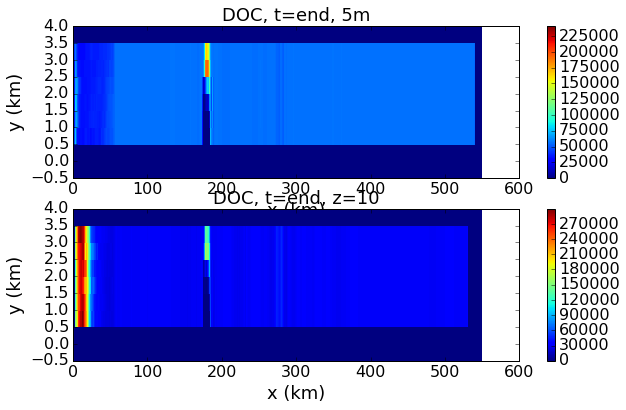

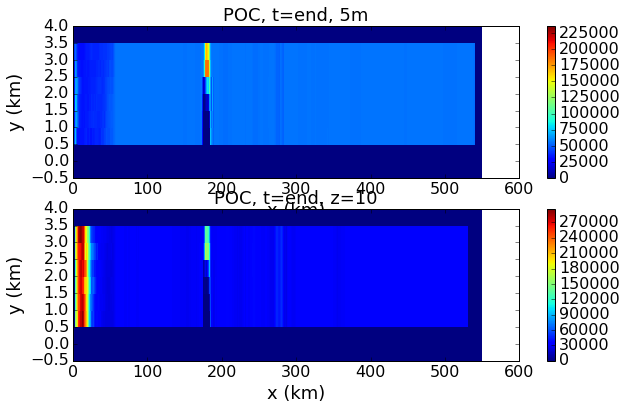

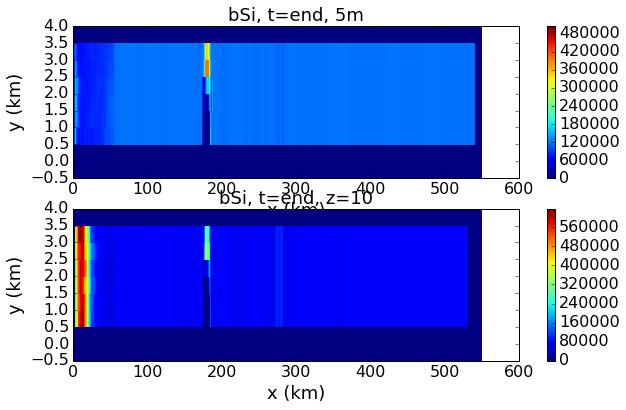

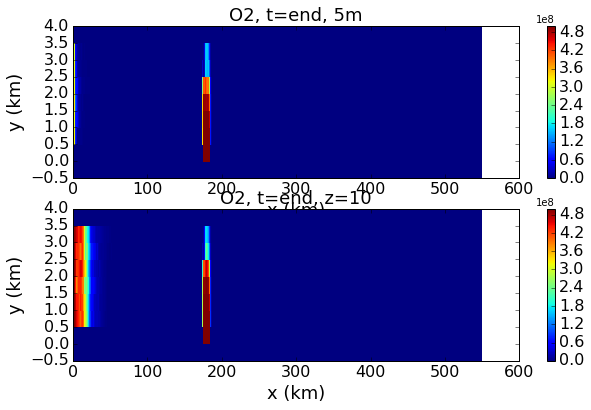

In [12]:
#zoom in:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xt,yt,f.variables[ik][-1,5,:,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (km)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=end, 5m', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 50, -450, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xt,yt,f.variables[ik][-1,10,:,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('y (km)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end, z=10', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([0, 50, -450, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)

In [13]:
fbdy=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01/bdy_cond/bio_OBC.nc')

In [14]:
print('NO3',np.max(fbdy.variables['NO3']),np.min(fbdy.variables['NO3']))
print('NH4',np.max(fbdy.variables['NH4']),np.min(fbdy.variables['NH4']))
print('PHY2',np.max(fbdy.variables['PHY2']),np.min(fbdy.variables['PHY2']))
print('Si',np.max(fbdy.variables['Si']),np.min(fbdy.variables['Si']))
print('bSi',np.max(fbdy.variables['bSi']),np.min(fbdy.variables['bSi']))

NO3 2.6656e+08 2.6656e+08
NH4 1e+07 1e+07
PHY2 9.32611e+06 9.32611e+06
Si 4.8606e+08 4.8606e+08
bSi 1.86522e-06 1.86522e-06


In [15]:
vv=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/SOG2D_1h_20141019_20141019_grid_V.nc')

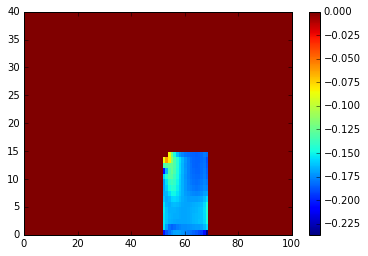

In [48]:
mesh0=plt.pcolormesh(vv.variables['vomecrty'][8,:,1,300:400])
cb0=plt.colorbar(mesh0)

In [12]:
uu=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/SOG2D_1h_20141019_20141019_grid_U.nc')

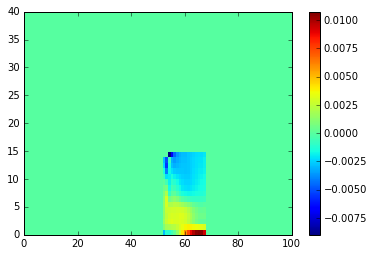

In [38]:
mesh0=plt.pcolormesh(uu.variables['vozocrtx'][2,:,1,300:400])
cb0=plt.colorbar(mesh0)

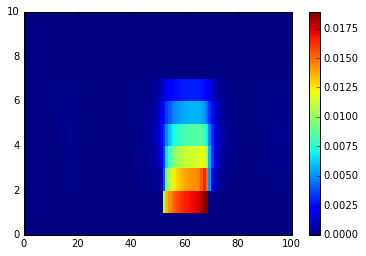

In [53]:
mesh0=plt.pcolormesh(vv.variables['vomecrty'][2,0,:,300:400])
cb0=plt.colorbar(mesh0)

In [26]:
print(vv.variables['vomecrty'][11,5,1,350:370])

[ 0.          0.         -0.21719815 -0.24281803 -0.23664066 -0.19366233
 -0.13085984 -0.11962962 -0.16054237 -0.19117592 -0.20102397 -0.19509198
 -0.16532589 -0.12852484 -0.11730163 -0.16723108 -0.20702015 -0.23035662
 -0.2414954   0.        ]


In [25]:
for t in range(24):
    print(str(t),np.max(vv.variables['vomecrty'][t,:,:,:]))
    print(str(t),np.min(vv.variables['vomecrty'][t,:,:,:]))

0 0.0160845
0 -0.0148315
1 0.0765524
1 -0.0827148
2 0.127031
2 -0.154709
3 0.293676
3 -0.269213
4 0.268293
4 -0.343532
5 0.336986
5 -0.33852
6 0.370379
6 -0.260713
7 0.25492
7 -0.354768
8 0.235116
8 -0.406309
9 0.263783
9 -0.614289
10 0.271302
10 -0.786358
11 0.387102
11 -0.782111
12 0.586894
12 -0.730138
13 0.907232
13 -1.10069
14 1.66709
14 -1.93169
15 1.84106
15 -1.92811
16 1.65949
16 -1.68955
17 1.51694
17 -1.42457
18 1.36919
18 -1.15438
19 1.26728
19 -1.11197
20 1.27408
20 -0.999446
21 1.1468
21 -0.892946
22 1.12906
22 -1.01348
23 1.37338
23 -1.44816


In [26]:
test=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/bdy_cond/Salish2D_3.6_South_M2_grid_U.nc')

In [27]:
print(test.variables)

OrderedDict([('nbidta', <class 'netCDF4._netCDF4.Variable'>
int32 nbidta(yb, xb)
    long_name: i grid position
    units: 1
unlimited dimensions: 
current shape = (1, 20)
filling on, default _FillValue of -2147483647 used
), ('nbjdta', <class 'netCDF4._netCDF4.Variable'>
int32 nbjdta(yb, xb)
    long_name: j grid position
    units: 1
unlimited dimensions: 
current shape = (1, 20)
filling on, default _FillValue of -2147483647 used
), ('nbrdta', <class 'netCDF4._netCDF4.Variable'>
int32 nbrdta(yb, xb)
    long_name: position from boundary
    units: 1
unlimited dimensions: 
current shape = (1, 20)
filling on, default _FillValue of -2147483647 used
), ('xb', <class 'netCDF4._netCDF4.Variable'>
int32 xb(xb)
    units: non dim
    long_name: counter around boundary
unlimited dimensions: 
current shape = (20,)
filling on, default _FillValue of -2147483647 used
), ('yb', <class 'netCDF4._netCDF4.Variable'>
int32 yb(yb)
    units: non dim
    long_name: counter along boundary
unlimited dimen

In [29]:
print(test.variables['u2'][:])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]


In [30]:
test2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/bdy_cond/Salish2D_3.6_South_M2_grid_V.nc')

In [32]:
print(test2.variables['v2'][:])

[[-0.28796923 -0.28796923 -0.28796923 -0.28796923 -0.28796923 -0.28796923
  -0.28796923 -0.28796923 -0.28796923 -0.28796923 -0.28796923 -0.28796923
  -0.28796923 -0.28796923 -0.28796923 -0.28796923 -0.28796923 -0.28796923
  -0.28796923 -0.28796923]]


In [17]:
m=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/mesh_mask.nc')

In [18]:
print(m.variables['vmask'])

<class 'netCDF4._netCDF4.Variable'>
int8 vmask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 40, 10, 1100)
filling off



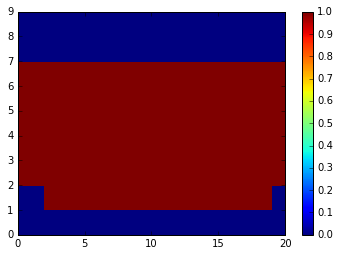

In [24]:
mesh0=plt.pcolormesh(m.variables['vmask'][0,0,0:9,350:370])
cb0=plt.colorbar(mesh0)

In [31]:
print(m.variables['vmask'][0,0,0:9,320:360])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]]


In [2]:
b=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_2d_2OBC/bathy_meter.nc')

In [3]:
print(b.variables)

OrderedDict([('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
float64 Bathymetry(y, x)
    least_significant_digit: 1
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
)])


In [4]:
print(b.variables['Bathymetry'][0:9,320:360])

[[  -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.    ]
 [  -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.    ]
 [ 133.375   133.875   134.25    134.4375  134.4375  134.125   133.5625
   132.75    131.6875  130.4375  129.125   127.75    126.375   125.125
   123.9375  123.      122.1875  121.6875  121.375   121.3125  121.

In [11]:
! cp /ocean/eolson/MEOPAR/NEMO-3.6-inputs/grid/bathy2D_36.nc /ocean/eolson/MEOPAR/NEMO-3.6-inputs/grid/bathy2D_36_2BDY.nc

In [12]:
bat=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-3.6-inputs/grid/bathy2D_36_2BDY.nc','r+',zlib=True)

In [16]:
bat.variables['Bathymetry'][0,352:369]=bat.variables['Bathymetry'][2,352:369]

In [17]:
print(bat.variables['Bathymetry'][0:9,320:360])

[[  -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
   142.5     144.5625  146.375   147.875   149.1875  150.1875  150.9375
   151.5   ]
 [  -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
    -0.       -0.       -0.       -0.       -0.       -0.       -0.       -0.
   142.5     144.5625  146.375   147.875   149.1875  150.1875  150.9375
   151.5   ]
 [ 133.375   133.875   134.25    134.4375  134.4375  134.125   133.5625
   132.75    131.6875  130.4375  129.125   127.75    126.375   125.125
   123.9375  123.      122.1875  121.6875  121.375   121.3125  

In [18]:
bat.close()